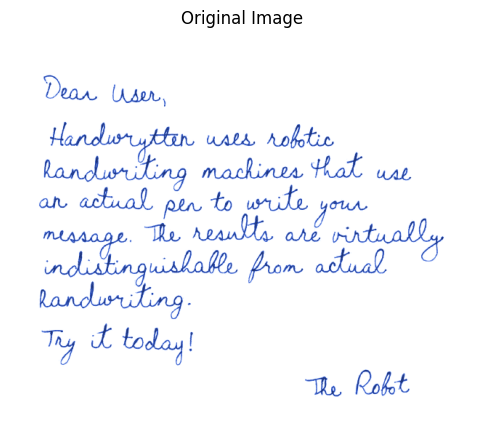

In [2]:
import os
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np

# so we can import from src/
try:
    current_dir = os.path.dirname(__file__)
except NameError:
    # __file__ is not defined in interactive environments like Jupyter
    current_dir = os.getcwd()

sys.path.append(os.path.abspath(os.path.join(current_dir, "..")))

from src.preprocessing import preprocess_image
# Path to your test image
img_path = os.path.abspath("../images/image1.png")

# Read image using OpenCV
img = cv2.imread(img_path)

# Convert BGR (OpenCV) to RGB (Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()



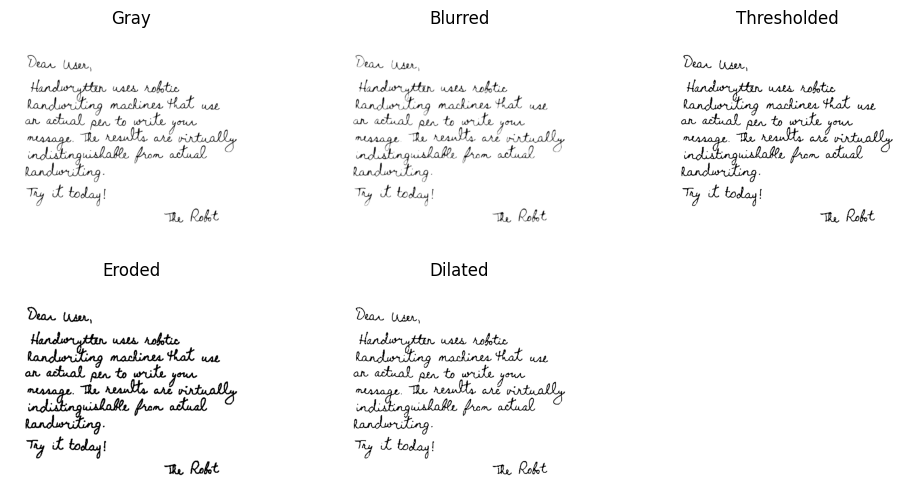

In [3]:
#preprocess the image
def show_preprocessing_steps(image_path):
    # Load
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Denoise
    blur = cv2.medianBlur(gray, 3)

    # Adaptive Thresholding
    th = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 15, 10
    )

    # Morphological operations
    kernel = np.ones((2,2), np.uint8)
    eroded = cv2.erode(th, kernel, iterations=1)
    dilated = cv2.dilate(eroded, kernel, iterations=1)

    # Show all results
    images = [gray, blur, th, eroded, dilated]
    titles = ["Gray", "Blurred", "Thresholded", "Eroded", "Dilated"]

    plt.figure(figsize=(12,6))
    for i in range(5):
        plt.subplot(2, 3, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Run it
show_preprocessing_steps(img_path)


Detected skew angle: -83.28


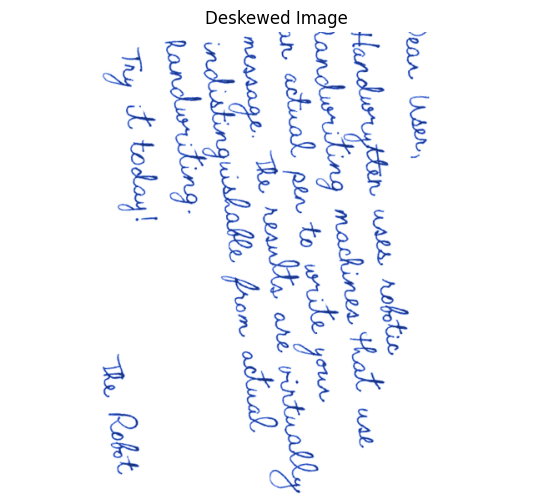

In [4]:
#visualizing deskewing
def deskew_image(img):
    """Detects rotation angle and deskews image."""
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)

    # threshold
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]

    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle

    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    print(f"Detected skew angle: {angle:.2f}")
    return rotated

# Deskew example
rotated = deskew_image(img)
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
plt.title("Deskewed Image")
plt.axis("off")
plt.show()


🌀 Deskew angle: -90.00 degrees


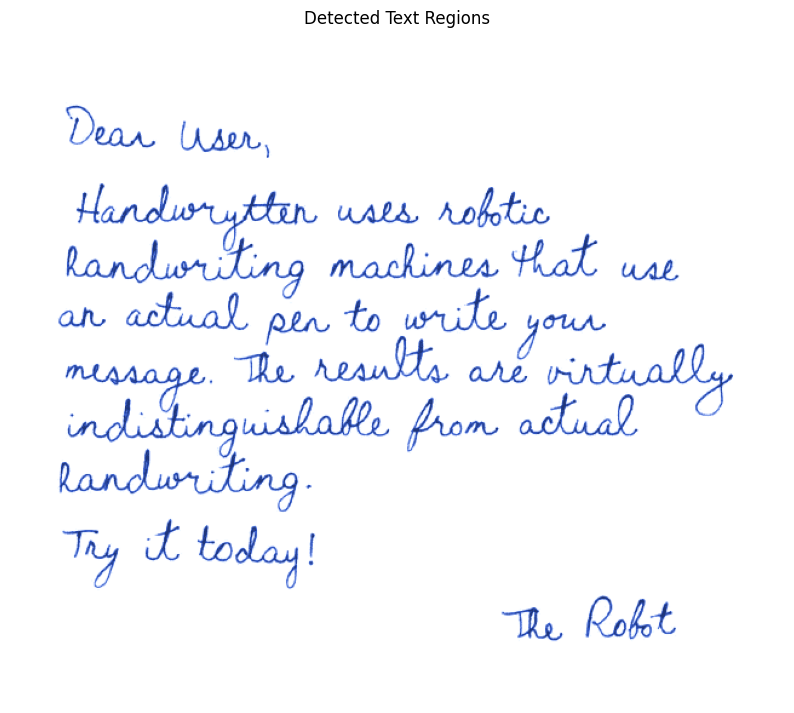

In [5]:
from src.detection import detect_text_regions

img = cv2.imread("../images/image1.png")
preprocessed = preprocess_image("../images/image1.png")

boxes = detect_text_regions(preprocessed)

vis = img.copy()
for (x, y, w, h) in boxes:
    cv2.rectangle(vis, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.title("Detected Text Regions")
plt.axis("off")
plt.show()
